In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scIB
import warnings
warnings.filterwarnings('ignore')

In [2]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/Thymus_raw.h5ad"

In [3]:
adata = sc.read(adata_file, cache=True)

In [4]:
scIB.preprocessing.reduce_data(adata, hvg=True, batch='tissue', pca=True, umap=True)


Number of highly variable genes: 4000


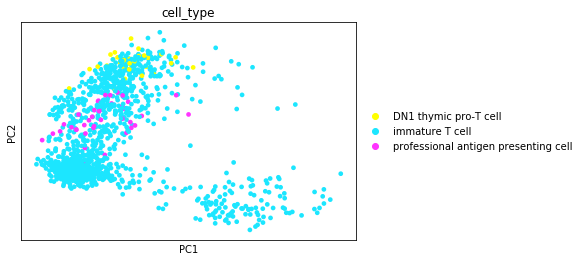

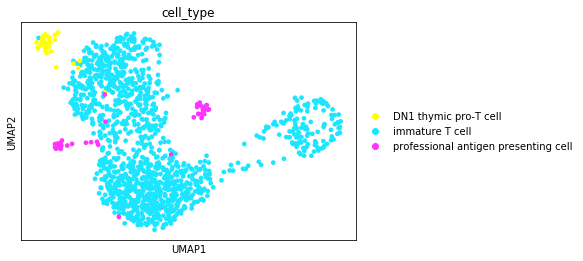

In [5]:
sc.pl.pca(adata, color=['cell_type'], palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color=['cell_type'], palette=sc.pl.palettes.godsnot_64)

## Clustering

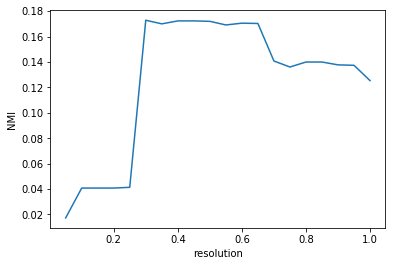

In [6]:
opt_clus = scIB.clustering.opt_louvain(adata, label='cell_type', 
                                                resolution=[x/20 for x in range(1,21)], 
                                                plot=True)

In [8]:
opt_clus[0:2] # (opt resolution, max NMI)

(0.3, 0.17279237433777006)

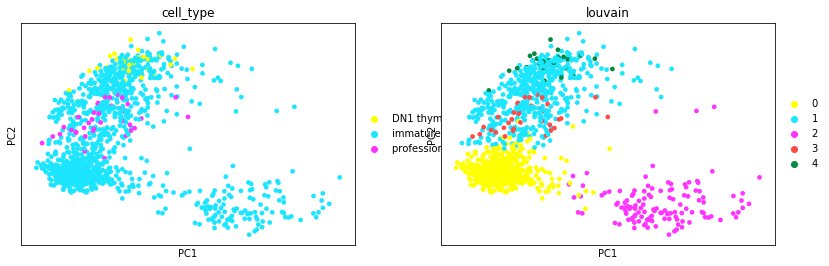

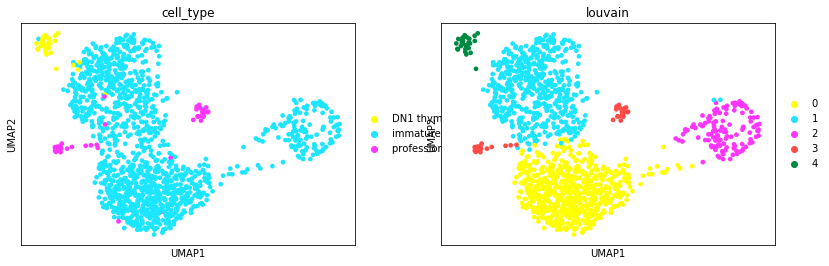

In [7]:
sc.pl.pca(adata, color=['cell_type', 'louvain'], palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color=['cell_type', 'louvain'], palette=sc.pl.palettes.godsnot_64)